In [1]:
import numpy as np
import sympy as sp
from sympy.plotting import plot
import matplotlib.pyplot as plt

### 1
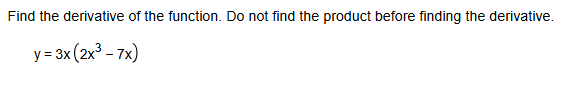



5. **Product Rule**  
    The derivative of a product is the first times the derivative of the second, plus the second times the derivative of the first.
    $$\Large \frac{d}{dx}[f(x) g(x)] = f'(x) g(x) + f(x) g'(x) $$

In [2]:
# Define the variable and the component functions
x = sp.symbols('x')

# Let:
f = 3*x
g = 2*x**3 - 7*x
display(f)
display(g)

3*x

2*x**3 - 7*x

In [3]:
y = f * g
y

3*x*(2*x**3 - 7*x)

In [4]:
# Derivatives of the component functions
f_prime = sp.diff(f, x)
g_prime = sp.diff(g, x)
display(f_prime)
display(g_prime)

3

6*x**2 - 7

In [5]:
# Apply the Product Rule
y_prime_product_rule = f_prime*g + f*g_prime
y_prime_product_rule

6*x**3 + 3*x*(6*x**2 - 7) - 21*x

In [6]:
# Let Sympy compute the derivative directly
y_prime_direct = sp.diff(y, x)
y_prime_direct

6*x**3 + 3*x*(6*x**2 - 7) - 21*x

In [7]:
sp.simplify(y_prime_direct)

24*x**3 - 42*x

### 3
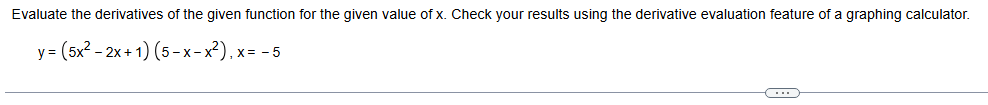

In [8]:
# Define the variable and the component functions
x = sp.symbols('x')

# Let:
f = 5*x**2 -2*x +1
g = 5 -x -x**2
y = f * g

# Derivatives of the component functions
df = sp.diff(f, x)
dg = sp.diff(g, x)
# Let Sympy compute the derivative directly
dy = sp.diff(y, x)

display(y)
display(f_prime)
display(g_prime)
display(dy)
display(sp.simplify(dy))
dy.subs(x, -5)

(-x**2 - x + 5)*(5*x**2 - 2*x + 1)

3

6*x**2 - 7

(-2*x - 1)*(5*x**2 - 2*x + 1) + (10*x - 2)*(-x**2 - x + 5)

-20*x**3 - 9*x**2 + 52*x - 11

2004

In [9]:
-20*5**3-9*5**2+52*5-11

-2476

### 4
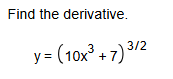

**Chain Rule**  
    $$\Large \frac{d}{dx}[f(g(x))] = f'(g) \cdot g' $$

In [10]:
y = (10*x**3 + 7)**sp.Rational(3,2)
y

(10*x**3 + 7)**(3/2)

In [11]:
dy = sp.diff(y,x)
dy

45*x**2*sqrt(10*x**3 + 7)

$$
y = \Big(\underbrace{10x^3 + 7}_{g(x)}\Big)^{\frac{3}{2}}
$$

$$ 
\begin{align*}
f &= (g)^{\frac{3}{2}} \\
g &= 10x^3 + 7 
\end{align*}
$$

$$ 
\begin{align*}
f' &= \frac{3}{2}(g)^{\frac{1}{2}} \\
g' &= 30x^2 
\end{align*}
$$

$$ 
\begin{align*}
y' &= f'(g) \cdot g' \\
y' &= \frac{3}{2}(g)^{\frac{1}{2}} \cdot 30x^2 \\
y' &= 45x^2(g)^{\frac{1}{2}} \\
y' &= 45x^2(10x^3 + 7 )^{\frac{1}{2}} \\
\end{align*}
$$

In [12]:
# Once more with sympy
x, g = sp.symbols('x, g')
y = (10*x**3 + 7)**sp.Rational(3,2)

In [13]:
gx = y.base
gx

10*x**3 + 7

In [14]:
fx = y.subs(gx,g)
fx

g**(3/2)

In [15]:
fp = fx.diff()
fp

3*sqrt(g)/2

In [16]:
gp = gx.diff()
gp

30*x**2

In [17]:
# Chain rule
yp = fp.subs(g, gx) * gp
display(yp)
display(y.diff())

45*x**2*sqrt(10*x**3 + 7)

45*x**2*sqrt(10*x**3 + 7)

### 5
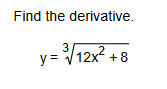

Same as #4.  The trick is that we can re-write that expression:
$$
y = (12x^2 +8)^{1/3}
$$

In [18]:
## I'm lazy, so
y = (12*x**2 + 8)**sp.Rational(1,3)
display(y)
display(y.diff())

(12*x**2 + 8)**(1/3)

8*x/(12*x**2 + 8)**(2/3)

### 6
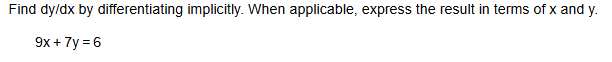

$$
\begin{align*}
9x +7y &= 6 \\
\frac{d}{dx}(9x) + \frac{d}{dx}(7y) &= \frac{d}{dx}(6) \\
9 + 7\frac{dy}{dx} &= 0 \\
7\frac{dy}{dx} &= -9 \\
\frac{dy}{dx} &= -\frac{9}{7}
\end{align*}
$$

In [19]:
## Once more with sympy!
y = sp.Function('y')(x)

# The implicit expression
expr = 9*x + 7*y - 6

# Differentiate both sides wrt x
d_expr = sp.diff(expr, x)
display(d_expr)

# Solve for dy/dx
dy_dx = sp.solve(d_expr, sp.Derivative(y, x))
dy_dx

7*Derivative(y(x), x) + 9

[-9/7]

### 7
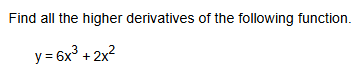

A higher derivative is simply the derivative of a derivative.

In [20]:
# This was easy to do using the power rule, but I wanted to do this programmatically
expr = 6*x**3 + 2*x**2

diff = sp.diff(expr, x)
display(diff)

i = 0
while diff != 0:
    i += 1
    if i > 10:
        break
    diff = sp.diff(diff, x)
    display(diff)

18*x**2 + 4*x

36*x + 4

36

0

### 8
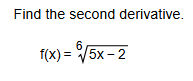

This is the chain rule, and annoying.

In [24]:
expr = sp.root(5*x-2,6)
display(expr)

diff = sp.diff(expr, x)
display(diff)

i = 1
nth = 2
while diff != 0:
    i += 1
    if i > 2:
        break
    diff = sp.diff(diff, x)
    display(diff)

(5*x - 2)**(1/6)

5/(6*(5*x - 2)**(5/6))

-125/(36*(5*x - 2)**(11/6))

But I don't actually know how to do this so, attempting:

$$
\begin{align*}
f(x) &= \sqrt[6]{5x-2} \\
f(x) &= (5x-2)^{1/6}
\end{align*}
$$

Apply the power rule and multiply by g'(x)
$$
\frac{1}{6}(5x-2)^{\frac{1}{6} - \frac{6}{6}} \cdot 5
$$
Simplify
$$
\frac{5}{6}(5x-2)^{-\frac{5}{6}}
$$
Chain rule again:
$$
5 \cdot \frac{5}{6} \cdot \frac{5}{6}(5x-2)^{-\frac{11}{6}}
$$
Simplify
$$
\frac{125}{36}(5x-2)^{-\frac{11}{6}}
$$

### 9
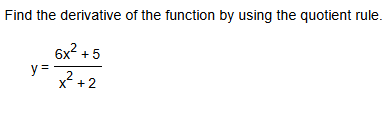

Note: I made a mistake applying the power rule.
 - Always be sure to multiply the power to the constant

**Quotient Rule**  
    $$\Large \frac{d}{dx} \!\!\left[\frac{f(x)}{g(x)}\right] = \frac{f'g - g'f}{g^2} $$

$$
\begin{align*}
y &= \frac{6x^2 +5}{x^2 +2} \\
y(x) &= \frac{f(x)}{g(x)} \\
f(x) &= 6x^2 +5 \\
g(x) &= x^2 +2 \\
f'(x) &= 12x \\
g'(x) &= 2x
\end{align*}
$$

$$
\frac{f'g - g'f}{g^2}
\quad \Rightarrow \quad
\frac{12x(x^2 +2) - 2x(6x^2 +5)}{(x^2 +2)^2}
$$
Simplify
$$
\frac{12x^3 +24x - 12x^3 -10x}{x^4 +4x^2 +4}
$$
Further
$$
\frac{14x}{x^4 +4x^2 +4}
$$


In [33]:
##Once more with sympy!
y = (6*x**2+5)/(x**2+2)
y

(6*x**2 + 5)/(x**2 + 2)

In [34]:
sp.simplify(y.diff(x))

14*x/(x**2 + 2)**2

### 11
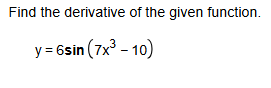

- **Chain Rule**  
$$
\frac{d}{dx}[f(g(x))] = f'(g) \cdot g' 
$$
- **Sine**
$$
\frac{d}{dx}(\sin x) = \cos x
$$
- **Coefficient Rule**  
    A coefficient can be factored out of the derivative.
    $$ \frac{d}{dx}[c \cdot f(x)] = c \cdot f'(x) $$

$$
\begin{align*}

y &= 6 \underbrace{\sin}_{f(x)}(\underbrace{7x^3-10}_{g(x)})
\\ y &= 6\cdot f(g(x))
\\
\\ f'(x) &= \cos(x)
\\ g'(x) &= 21x^2
\\
\\ y'(x) &= 6 \cdot f'(g) \cdot g'
\\ y'(x) &= 6 \cdot \cos(7x^3-10) \cdot 21x^2
\\ y'(x) &= 21x^2 \cdot 6 \cdot \cos(7x^3-10)
\\ y'(x) &= 126x^2 \cos(7x^3-10)

\end{align*}
$$

In [36]:
y = 6*sp.sin(7*x**3-10)
y.diff()

126*x**2*cos(7*x**3 - 10)

### 12
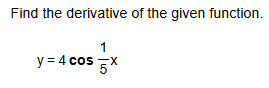

- **Chain Rule**  
    $$
    \frac{d}{dx}[f(g(x))] = f'(g) \cdot g' 
    $$
- **Cosine**
    $$
    \frac{d}{dx}(\cos x) = -\sin x
    $$
- **Coefficient Rule**  
    $$ 
    \frac{d}{dx}[c \cdot f(x)] = c \cdot f'(x) 
    $$

I did it in my head!
$$
y'(x) = -\frac{4}{5} \sin \frac{1}{5}x
$$

### 13
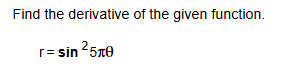

In [40]:
from sympy.abc import pi, theta
y = sp.sin(5*pi*theta)**2
display(y)
display(y.diff(theta))

sin(5*pi*theta)**2

10*pi*sin(5*pi*theta)*cos(5*pi*theta)

$$
\begin{align*}
r &= \sin^2(5\pi\theta)
\\ r &= [ \underbrace{\sin}_{g(x)} ( \underbrace{5\pi\theta}_{h(x)} ) \underbrace{]^2}_{f(x)}
\\ r &= f(g(h(x))) 
\\
\\ f(x) &= x^2
\\ g(x) &= \sin(x)
\\ h(x) &= 5\pi x
\\
\\ f' &= 2x
\\ g' &= \cos(x)
\\ h' &= 5\pi
\end{align*}
$$

- **Chain Rule**  
    $$
    \frac{d}{dx}[f(g(x))] = f'(g) \cdot g' 
    $$

$$
\begin{align*}
g' &= g'(h) \cdot h'
\\ g' &= \cos(5\pi\theta) \cdot 5\pi
\\
\\ f' &= f'(g) \cdot g'
\\ f' &= 2\sin(5\pi\theta) \cdot g'
\\ f' &= 2\sin(5\pi\theta) \cdot \cos(5\pi\theta) \cdot 5\pi
\\ f' &= 10\pi\sin(5\pi\theta) \cdot \cos(5\pi\theta)
\end{align*}
$$

### 14
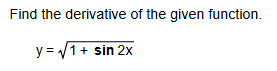

In [42]:
y = sp.sqrt(1+sp.sin(2*x))
y.diff()

cos(2*x)/sqrt(sin(2*x) + 1)

### 15
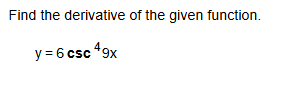

- **Cosecant**
  $$
  \frac{d}{dx}(\csc x) = -\csc x \cot x
  $$
- **Chain Rule**
  $$ \frac{d}{dx}[f(g(x))] = f'(g) \cdot g'(x) $$

In [44]:
y = 6*sp.csc(9*x)**4
y.diff()

-216*cot(9*x)*csc(9*x)**4

$$
    6 [\csc(9x)]^4
\\  6 [\csc(9x)]^4 \cdot 9
\\  6 [\csc(9x)]^4 \cdot 9 \cdot -\csc(9x)\cot(9x)
\\  9 \cdot 6 \cdot 4[\csc(9x)]^3 \cdot  -1\csc(9x)\cot(9x)
\\  -216[\csc(9x)]^3 \cdot  \csc(9x)\cot(9x)
\\  -216[\csc(9x)]^4 \cdot  \cot(9x)
\\  -216\csc^4(9x) \cdot  \cot(9x)
\\  -216\cot(9x)\csc^4(9x) 

### 16
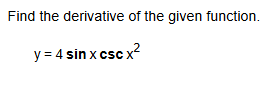

- **Product Rule**  
    $$ \frac{d}{dx}[f(x) g(x)] = f'(x) g(x) + f(x) g'(x) $$

- **Cosecant**
  $$
  \frac{d}{dx}(\csc x) = -\csc x \cot x
  $$

- **Sine**
  $$
  \frac{d}{dx}(\sin x) = \cos x
  $$

$$
\begin{align*}

\end{align*}
$$

$$
\begin{align*}
    y &= 4\sin(x)\csc(x^2)
\\  y &= 4 f(x) g(h(x))
\\
\\  f' &= \cos(x)
\\  g' &= -2x\csc(x^2)\cot(x^2)
\\
\\  y' &= f'g(x) + g'f(x)
\\  y' &= \cos(x)\csc(x^2) + -2x\csc(x^2)\cot(x^2)\sin(x)
\end{align*}
$$

### 17
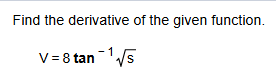

This again relies on the chain rule. But it also relies on knowing the d' of the inverse tangent function.  I decline to subject myself to that headache so:

In [46]:
y = 8*sp.atan(sp.sqrt(x))
y.diff()

4/(sqrt(x)*(x + 1))

In [49]:
#18
y = 8*sp.log(x**3, 10)
y.diff()

24/(x*log(10))

### 19
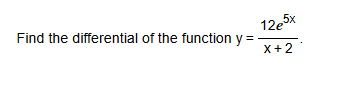

- **Coefficient Rule**  
    $$ 
    \frac{d}{dx}[c \cdot f(x)] = c \cdot f'(x) 
    $$
- **Chain Rule**  
    $$
    \frac{d}{dx}[f(g(x))] = f'(g) \cdot g' 
    $$
- **Quotient Rule**  
    $$
    \frac{d}{dx} \!\!\left[\frac{f(x)}{g(x)}\right] = \frac{f'g - g'f}{g^2} 
    $$

In [ ]:
wrt = x
numer = 12*sp.E**(5*x)
d_numer = numer.diff(wrt)
d_numer

60*exp(5*x)

In [64]:
denom = x+2
d_denom = denom.diff(wrt)
d_denom

1

In [65]:
top = d_numer*denom - d_denom*numer
top

60*(x + 2)*exp(5*x) - 12*exp(5*x)

In [66]:
bottom = denom**2
bottom

(x + 2)**2

In [67]:
diff_quotient_rule = top/bottom
diff_quotient_rule

(60*(x + 2)*exp(5*x) - 12*exp(5*x))/(x + 2)**2

In [ ]:
diff_quotient_rule.as_numer_denom()[0].expand()/(denom**2).expand()

(60*x*exp(5*x) + 108*exp(5*x))/(x**2 + 4*x + 4)

In [89]:
import sympy as sp
x = sp.symbols('x')

my_expr = (20*sp.E**(5*x)) / (x+3)
display(my_expr)

20*exp(5*x)/(x + 3)

In [ ]:
def quotient_rule(expr, wrt=x):
    numer, denom = expr.as_numer_denom()
    d_numer = numer.diff(wrt)
    d_denom = denom.diff(wrt)
    top = d_numer*denom - d_denom*numer
    bottom = denom**2
    return sp.simplify(top.expand())/bottom

quotient_rule(my_expr)

(100*x + 280)*exp(5*x)/(x + 3)**2

In [88]:
my_expr.diff().simplify()

(100*x + 280)*exp(5*x)/(x**2 + 6*x + 9)

In [91]:
numer, denom = my_expr.as_numer_denom()
display(num)
display(denom)

20*exp(5*x)

x + 3

In [92]:
d_numer = num.diff()
d_denom = denom.diff()
display(d_num)
display(d_denom)

100*exp(5*x)

1

In [95]:
top = d_numer*denom - d_denom*numer
display(top)
display(top.simplify())

100*(x + 3)*exp(5*x) - 20*exp(5*x)

(100*x + 280)*exp(5*x)

In [100]:
top = top.simplify()
bottom = denom**2
answer = top/bottom
display(answer)

(100*x + 280)*exp(5*x)/(x + 3)**2

$$
\Large
\underbrace{
\frac{dy}{dx} = \frac{(100 x  + 280 )e^{5 x}}{(x+3)^2} 
}_{\text{Derivative}}

\quad \iff \quad

\underbrace{
dy = dx\left[ \frac{(100 x  + 280 )e^{5 x}}{(x+3)^2} \right]
}_{\text{Differential}}
$$

### 20
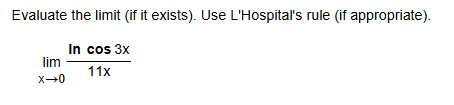